# Data Cleaning

### Load dataset and check 

In [1]:
import pandas as pd
import numpy as np
import math
import os

In [2]:

leboncoin_ads=pd.read_json(os.getcwd()+"/leboncoin_ads_batch_1_100.json")
leboncoin_ads.head()

,list_id,first_publication_date,expiration_date,index_date,status,category_id,category_name,subject,body,brand,...,price_cents,images,attributes,location,owner,options,has_phone,similar,counters,is_boosted
0,2913601172,2025-01-05 05:23:38,2025-03-06 05:23:38,2025-01-05 05:23:38,active,2,Voitures,Clio 4 IV 0.9 TCE 90 Intens GT Line e85,,leboncoin,...,1280000,{'nb_images': 0},"[{'key': 'rating_score', 'value': '0.98', 'val...","{'country_id': 'FR', 'region_id': '18', 'regio...","{'store_id': '1054658', 'user_id': '26aa6adb-c...","{'has_option': False, 'booster': False, 'photo...",False,NaN,{},NaN
1,2913601170,2025-01-05 05:23:28,2025-03-06 05:23:28,2025-01-05 05:23:28,active,2,Voitures,Golf 1.6 tdi 2000,,leboncoin,...,200000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'profile_picture_url', 'value': 'http...","{'country_id': 'FR', 'region_id': '26', 'regio...","{'store_id': '18620454', 'user_id': '477bedd1-...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},NaN
2,2913601154,2025-01-05 05:22:57,2025-03-06 05:22:57,2025-01-05 05:22:57,active,2,Voitures,Clio 4,,leboncoin,...,635000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'profile_picture_url', 'value': 'http...","{'country_id': 'FR', 'region_id': '7', 'region...","{'store_id': '77115844', 'user_id': '9c9f78ea-...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},NaN
3,2913601096,2025-01-05 05:21:37,2025-03-06 05:21:37,2025-01-05 05:21:37,active,2,Voitures,RENAULT ESPACE V 1.6 DCI 160ch,,leboncoin,...,1315500,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'rating_score', 'value': '1', 'values...","{'country_id': 'FR', 'region_id': '21', 'regio...","{'store_id': '31290620', 'user_id': 'c9461c3d-...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},NaN
4,2913601076,2025-01-05 05:21:17,2025-03-06 05:21:17,2025-01-05 05:21:17,active,2,Voitures,Audi Q3 SPORTBACK,,leboncoin,...,2590000,{'thumb_url': 'https://img.leboncoin.fr/api/v1...,"[{'key': 'rating_score', 'value': '0.97', 'val...","{'country_id': 'FR', 'region_id': '22', 'regio...","{'store_id': '2231955', 'user_id': '825b130c-9...","{'has_option': False, 'booster': False, 'photo...",True,NaN,{},NaN


In [3]:
leboncoin_ads.shape

(3500, 23)

In [4]:
leboncoin_ads.columns

Index(['list_id', 'first_publication_date', 'expiration_date', 'index_date',
       'status', 'category_id', 'category_name', 'subject', 'body', 'brand',
       'ad_type', 'url', 'price', 'price_cents', 'images', 'attributes',
       'location', 'owner', 'options', 'has_phone', 'similar', 'counters',
       'is_boosted'],
      dtype='object')

In [5]:
#compter le nombre de modalités par column
for column_name in leboncoin_ads.columns:
    try:
        print(column_name," : ",len(set(leboncoin_ads[column_name])))
    except TypeError as e:
        print(column_name, f"Error: {e}")
        pass

list_id  :  3459
first_publication_date  :  2701
expiration_date  :  1895
index_date  :  2007
status  :  1
category_id  :  1
category_name  :  1
subject  :  3212
body  :  1
brand  :  1
ad_type  :  1
url  :  3459
price Error: unhashable type: 'list'
price_cents  :  878
images Error: unhashable type: 'dict'
attributes Error: unhashable type: 'list'
location Error: unhashable type: 'dict'
owner Error: unhashable type: 'dict'
options Error: unhashable type: 'dict'
has_phone  :  2
similar  :  3500
counters Error: unhashable type: 'dict'
is_boosted  :  2671


### Clean columns

First selection of variables

In [6]:

#Sélectionner variables pertinentes:
# - Index_date=first_publication_date (retirer doublons)
# - Retirer variables avec une seule modalité
# - Retirer "subject" car les infos sont déjà présentes dans "attributes"
# -"similar" ne contient que des NaN
# -"counters" ne contient que des dictionnaires vides
# -retirer url de l'annonce
# -price_cents=price*100
leboncoin_ads_filtered=leboncoin_ads[['list_id', 'first_publication_date', 'expiration_date', 
       'ad_type', 'price', 'images', 'attributes',
       'location', 'owner', 'options', 'has_phone',
       'is_boosted']]

Process data

In [7]:
class data_processing:
    def __init__(self):
        pass
    def list_dict_handling(self):
        self.loc[:, "price"]=self["price"].apply(lambda prix: prix[0])
        """ shatter the variables containing lists and dictionnairies and transform their values into columns"""
        ploo=pd.DataFrame()
        attributs=pd.DataFrame()
        for row_num in range(self.shape[0]):
            ploo_col=pd.DataFrame()
            for column_name in ["location",'owner','options']:
    # Extract 'attributes' column as a DataFrame
                temporary_df=pd.DataFrame(self.loc[row_num,column_name].items()).set_index(0).transpose()
                ploo_col = pd.concat([ploo_col,temporary_df],axis=1)
                ploo_col["list_id"]=self.loc[row_num,"list_id"]
            ploo=pd.concat([ploo,ploo_col],axis=0,ignore_index=True)
            temporary_df=pd.DataFrame(self.loc[row_num,"attributes"]).set_index("key").transpose()
            temporary_df=temporary_df[temporary_df.index=="value_label"]
            temporary_df["list_id"]=self.loc[row_num,"list_id"]
            attributs=pd.concat([attributs,temporary_df],axis=0,ignore_index=True)
        extended_dataset=self.merge(pd.concat([attributs,ploo],axis=1).T.reset_index().drop_duplicates(subset=["index"]).set_index('index').T,
                                                             how='outer',on='list_id') 
        return extended_dataset
    def library(self):
        return pd.DataFrame(self.loc[0]["attributes"])[["key","key_label"]]
    def clean_columns(self):
    #is_boosted : remplacer les NaN par 0
        self["is_boosted"]=self["is_boosted"].apply(lambda x: 0 if math.isnan(x) else x)
        cols=["images","profile_picture_url","vehicle_is_eligible_p2p","car_rotation_delay","licence_plate_available",
      "vehicle_history_report_public_url","vehicle_damage","activity_sector","vehicle_history_report_status","store_logo","store_name"]
        self[cols]=self[cols].apply(lambda col: col.map(lambda x: 0 if pd.isna(x) else 1))
# convertir en numérique
        self["mileage"]=self["mileage"].apply(lambda x: float(x.split(" km")[0]))
        def sparse_years(x):
            if pd.notna(x):
                if ' ans' in x:
                    return float(x.split(' ans')[0])
                elif ' an' in x:
                    return float(x.split(' an')[0])
                else:
                    return np.nan
            else:
                return np.nan
        self["spare_parts_availability"]=self["spare_parts_availability"].apply(lambda x:sparse_years(x))
        self["horsepower"]=self["horsepower"].apply(lambda x:float(x.split(' Cv')[0]) if pd.notna(x) else np.nan)
        self["horse_power_din"]=self["horse_power_din"].apply(lambda x:float(x.split(' Ch')[0]) if pd.notna(x) else np.nan)
        cols=['rating_score', 'car_price_min', 'car_price_max',"old_price","siren","price","lat","lng","regdate","gross_vehicle_weight"]
        self[cols]=self[cols].apply(lambda col: col.map(lambda x: float(x) if pd.notna(x) else np.nan))
#replace Nan par "non spécifé"
        cols=["doors","seats","vehicle_technical_inspection_a","vehicle_type","vehicle_upholstery","vehicle_specifications",
      "vehicule_color","critair","ad_warranty_type","recent_used_vehicle","vehicle_history_report_status",
        "vehicle_euro_emissions_standard",'u_car_brand', 'u_car_model',"car_contract"]
        self[cols]=self[cols].apply(lambda col: col.map (lambda x: "unknown" if pd.isna(x) else x))
        self["vehicle_interior_specs"]=self["vehicle_interior_specs"].apply(lambda x: "unknow interior" if pd.isna(x) else x)
#renommer certaines modalités:
        self["vehicle_interior_specs"]=self["vehicle_interior_specs"].apply(lambda l: [ 
        'Phares LED' if x == 'Phares LED / Xenon' 
        else 'Toit ouvrant' if x == 'Toit ouvrant / Toit panoramique' 
        else x
        for x in l.split(", ")] if isinstance(l,list) else l)
        for spec in ["Climatisation", "Toit ouvrant",  "Régulateur de vitesse", "Système de navigation", "Attelage de remorque", 
             "Aide au stationnement", "Jantes en alliage", "Bluetooth", "Phares LED", "Sièges chauffants","unknow interior"]:
            self[spec]=self['vehicle_interior_specs'].apply(lambda x: 1 if spec in x else 0)
        return self
    def drop_columns(self):
        cols=["attributes","location","owner","options","vehicle_interior_specs",# Enlever les variables contenant les dictionnaires
              "brand","model","rating_count","region_id","department_id","city_label",#Enlever variables répétitives
              "argus_object_id","feature","list_id",'online_store_id','custom_ref','store_id','user_id',#Enlever variables non pertinentes
              "vehicle_vsp","is_import","country_id","provider","booster",'photosup', 'urgent', 'gallery','continuous_top_ads','highlight',
              "ad_type","images"#Enlever variables avec une seule modalité:
              ]
        return self.drop(columns=cols)
        

In [8]:

# #Processing
leboncoin_ads_filtered_extended=data_processing.list_dict_handling(leboncoin_ads_filtered)
dico_attributs=data_processing.library(leboncoin_ads_filtered)
leboncoin_ads_filtered_extended=data_processing.clean_columns(leboncoin_ads_filtered_extended)
leboncoin_ads_filtered_extended=data_processing.drop_columns(leboncoin_ads_filtered_extended)
leboncoin_ads_filtered_extended=leboncoin_ads_filtered_extended.rename(columns={"mileage":"mileage_km",
                                                                                "horsepower":"horsepower_cv"})
print("Taille:",leboncoin_ads_filtered_extended.shape,"\ncolumns: ",leboncoin_ads_filtered_extended.columns)

Taille: (3582, 69) 
columns:  Index(['first_publication_date', 'expiration_date', 'price', 'has_phone',
       'is_boosted', 'rating_score', 'profile_picture_url', 'u_car_brand',
       'u_car_model', 'regdate', 'mileage_km', 'fuel', 'gearbox', 'doors',
       'seats', 'vehicle_technical_inspection_a', 'issuance_date',
       'vehicle_damage', 'vehicle_type', 'vehicle_upholstery',
       'vehicle_specifications', 'vehicule_color', 'horsepower_cv',
       'horse_power_din', 'ad_warranty_type', 'vehicle_is_eligible_p2p',
       'car_price_min', 'car_price_max', 'car_rotation_delay',
       'vehicle_history_report_public_url', 'licence_plate_available',
       'vehicle_euro_emissions_standard', 'critair', 'old_price',
       'activity_sector', 'car_contract', 'recent_used_vehicle',
       'spare_parts_availability', 'vehicle_history_report_status',
       'vehicle_usage', 'gross_vehicle_weight', 'has_visibility_option',
       'store_logo', 'store_name', 'region_name', 'department_name', 

Feature engineering

In [9]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [10]:
# Convert columns to datetime
leboncoin_ads_filtered_extended["first_publication_date"] = pd.to_datetime(leboncoin_ads_filtered_extended["first_publication_date"])
leboncoin_ads_filtered_extended["expiration_date"] = pd.to_datetime(leboncoin_ads_filtered_extended["expiration_date"])

#Today
today = datetime.today()
# Calculate age of ad in days
leboncoin_ads_filtered_extended["age_annonce(in days)"] = leboncoin_ads_filtered_extended["first_publication_date"].apply(
    lambda date: (
        relativedelta(today, date).years * 365 +
        relativedelta(today, date).months * 30 +
        relativedelta(today, date).days
    ) if pd.notna(date) else np.nan  # Return NaN if date is NaT
)

# Calculate delay of ad in days
leboncoin_ads_filtered_extended["delai_annonce(in days)"] = leboncoin_ads_filtered_extended.apply(
    lambda row: (
        relativedelta(row["expiration_date"], row["first_publication_date"]).years * 365 +
        relativedelta(row["expiration_date"], row["first_publication_date"]).months * 30 +
        relativedelta(row["expiration_date"], row["first_publication_date"]).days
    ) if pd.notna(row["first_publication_date"]) and pd.notna(row["expiration_date"]) else np.nan,  # Return NaN if either date is NaT
    axis=1
)
#Calculate age model of the car
leboncoin_ads_filtered_extended["age_model_car"]=leboncoin_ads_filtered_extended["regdate"].apply(lambda date: 2024-date)

#Delete "engineered" columns
leboncoin_ads_filtered_extended.drop(columns=["first_publication_date","expiration_date","regdate"],inplace=True)
print("Taille:",leboncoin_ads_filtered_extended.shape,"\ncolumns: ",leboncoin_ads_filtered_extended.columns)



Taille: (3582, 69) 
columns:  Index(['price', 'has_phone', 'is_boosted', 'rating_score',
       'profile_picture_url', 'u_car_brand', 'u_car_model', 'mileage_km',
       'fuel', 'gearbox', 'doors', 'seats', 'vehicle_technical_inspection_a',
       'issuance_date', 'vehicle_damage', 'vehicle_type', 'vehicle_upholstery',
       'vehicle_specifications', 'vehicule_color', 'horsepower_cv',
       'horse_power_din', 'ad_warranty_type', 'vehicle_is_eligible_p2p',
       'car_price_min', 'car_price_max', 'car_rotation_delay',
       'vehicle_history_report_public_url', 'licence_plate_available',
       'vehicle_euro_emissions_standard', 'critair', 'old_price',
       'activity_sector', 'car_contract', 'recent_used_vehicle',
       'spare_parts_availability', 'vehicle_history_report_status',
       'vehicle_usage', 'gross_vehicle_weight', 'has_visibility_option',
       'store_logo', 'store_name', 'region_name', 'department_name', 'city',
       'zipcode', 'lat', 'lng', 'source', 'is_shape', '

# Data exploration

In [11]:
from scipy.stats import kruskal

In [12]:
#Price distribution:
leboncoin_ads_filtered_extended.describe()["price"]

count      3582.000000
mean      15786.281686
std       22390.903677
min           1.000000
25%        4760.000000
50%       10200.000000
75%       19200.000000
max      419900.000000
Name: price, dtype: float64

In [13]:
#numerical variables correlation
leboncoin_ads_filtered_extended[leboncoin_ads_filtered_extended.columns[~leboncoin_ads_filtered_extended.columns.isin(leboncoin_ads_filtered_extended.select_dtypes(include='object').columns)]].corr()["price"] 
               

price                                1.000000
has_phone                            0.163637
is_boosted                           0.205942
rating_score                         0.037842
profile_picture_url                 -0.314791
mileage_km                          -0.402823
vehicle_damage                      -0.055019
horsepower_cv                        0.404030
horse_power_din                      0.639800
vehicle_is_eligible_p2p             -0.383896
car_price_min                        0.867458
car_price_max                        0.866392
car_rotation_delay                  -0.017933
vehicle_history_report_public_url    0.094155
licence_plate_available              0.024851
old_price                            0.995936
activity_sector                      0.318871
spare_parts_availability            -0.154677
vehicle_history_report_status        0.152702
gross_vehicle_weight                 0.770555
store_logo                           0.241486
store_name                        

In [14]:
#correlation avec variables catégorielles
#Correlation avec la demande de places de parkings
for col in leboncoin_ads_filtered_extended.select_dtypes(include='object').columns:
        track=0
        for modalite1 in set(list(leboncoin_ads_filtered_extended[col])):
            for modalite2 in set(list(leboncoin_ads_filtered_extended[col])):
                if track==1:
                    break
                if modalite1!=modalite2:
                    try: 
                        if kruskal(leboncoin_ads_filtered_extended[leboncoin_ads_filtered_extended[col]==modalite1]['price'],
                            leboncoin_ads_filtered_extended[leboncoin_ads_filtered_extended[col]==modalite2]['price']).pvalue<0.05:
                            track+=1
                            print(col,"Reject the null hypothesis: There is a significant difference between the groups.")
                    except:
                        pass

u_car_brand Reject the null hypothesis: There is a significant difference between the groups.
u_car_model Reject the null hypothesis: There is a significant difference between the groups.
fuel Reject the null hypothesis: There is a significant difference between the groups.
gearbox Reject the null hypothesis: There is a significant difference between the groups.
doors Reject the null hypothesis: There is a significant difference between the groups.
seats Reject the null hypothesis: There is a significant difference between the groups.
vehicle_technical_inspection_a Reject the null hypothesis: There is a significant difference between the groups.
issuance_date Reject the null hypothesis: There is a significant difference between the groups.
vehicle_type Reject the null hypothesis: There is a significant difference between the groups.
vehicle_upholstery Reject the null hypothesis: There is a significant difference between the groups.
vehicle_specifications Reject the null hypothesis: The

C:\Users\Annek\AppData\Local\Temp\ipykernel_10444\3598913999.py:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  if kruskal(leboncoin_ads_filtered_extended[leboncoin_ads_filtered_extended[col]==modalite1]['price'],


region_name Reject the null hypothesis: There is a significant difference between the groups.
department_name Reject the null hypothesis: There is a significant difference between the groups.
city Reject the null hypothesis: There is a significant difference between the groups.
zipcode Reject the null hypothesis: There is a significant difference between the groups.
source Reject the null hypothesis: There is a significant difference between the groups.
is_shape Reject the null hypothesis: There is a significant difference between the groups.
type Reject the null hypothesis: There is a significant difference between the groups.
name Reject the null hypothesis: There is a significant difference between the groups.
no_salesmen Reject the null hypothesis: There is a significant difference between the groups.
has_option Reject the null hypothesis: There is a significant difference between the groups.
sub_toplist Reject the null hypothesis: There is a significant difference between the grou

In [16]:
#number of missing information
proportion_missing_factors={}

for col in ['is_boosted',"profile_picture_url","vehicle_is_eligible_p2p","car_rotation_delay","licence_plate_available",
      "vehicle_history_report_public_url","vehicle_damage","activity_sector","vehicle_history_report_status"]:
    proportions=leboncoin_ads_filtered_extended[col].value_counts(normalize=True)
    proportion_missing_factors[col]=proportions.get(0,0)
for col in ["doors","seats","vehicle_technical_inspection_a","vehicle_type","vehicle_upholstery","vehicle_specifications",
      "vehicule_color","critair","horsepower_cv","ad_warranty_type","recent_used_vehicle","vehicle_history_report_status",
        "spare_parts_availability","vehicle_euro_emissions_standard"]:
    proportions=(leboncoin_ads_filtered_extended[col].value_counts()/leboncoin_ads_filtered_extended.shape[0])
    proportion_missing_factors[col]=proportions.get("unknwonw", 0)
for col in ['rating_score', 'car_price_min', 'car_price_max',"old_price","siren","price","lat","lng","horsepower_cv","mileage_km"]:
    proportion_missing_factors[col]=leboncoin_ads_filtered_extended[col].isna().sum()/leboncoin_ads_filtered_extended.shape[0]
proportion_missing_factors["unknow interior"]=leboncoin_ads_filtered_extended["unknow interior"].value_counts(normalize=True).get(1,0)
#afficher facteurs informations non disponibles
{key: value for key, value in proportion_missing_factors.items() if value > 0}

{'is_boosted': 0.7604690117252931,
 'profile_picture_url': 0.30876605248464545,
 'vehicle_is_eligible_p2p': 0.3210496929089894,
 'car_rotation_delay': 0.7082635399218313,
 'licence_plate_available': 0.38637632607481853,
 'vehicle_history_report_public_url': 0.734785036292574,
 'vehicle_damage': 0.5505304299274149,
 'activity_sector': 0.6973757677275265,
 'horsepower_cv': 0.135678391959799,
 'rating_score': 0.7010050251256281,
 'car_price_min': 0.7185929648241206,
 'car_price_max': 0.7308766052484645,
 'old_price': 0.852037967615857,
 'siren': 0.7063093243997767,
 'unknow interior': 0.5488553880513679}

Some graphs

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Colonnes necessaires à explorer (d'après littérature et analyse de correlation (seuil 20%)):
cols_to_explore_num=['mileage_km',"age_model_car","gross_vehicle_weight","horsepower_cv","horse_power_din"]#variables numériques
cols_to_explore_bin=['vehicle_history_report_public_url',"profile_picture_url","activity_sector","vehicle_is_eligible_p2p"] #variables binaires
cols_to_explore_qual=[ 'doors',"seats",'region_name','u_car_brand','fuel','gearbox','vehicle_type','vehicule_color'
                      ,"ad_warranty_type"]#Variables qualitatives

In [24]:
# Create the folder if it doesn't exist
if not os.path.exists("graphs"):
    os.makedirs("graphs")
def binary_categorical_plot(column_name, data):
    # Set up the figure
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the boxplot of price based on the binary variable
    if len(data[column_name].unique())<=4:
        sns.boxplot(x=column_name, y='price', data=data, ax=ax)
        ax.set_title(f'Price Distribution by {column_name}')
        ax.set_xlabel(f'{column_name}')
        ax.set_ylabel('Price')
    else:
        data=leboncoin_ads_filtered_extended.groupby(column_name)['price'].mean().reset_index()
        sns.barplot(x=column_name,y="price", data=data)
        ax.set_title(f'Mean price pistribution by {column_name}')
        ax.set_xlabel(f'{column_name}')
        ax.set_ylabel('Price')

    # Calculate proportions of each modality in the binary variable
    count_data = data[column_name].value_counts(normalize=True)
    
    # Set the x-ticks to display the proportions
    labels = [f'{label} ({count_data[label]:.2%})' for label in count_data.index]
    ticks=[i for i in range(len(labels))]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels, rotation=90)  # Rotate labels to 90 degrees

    # Add mean price value on top of each boxplot
    mean_price = data.groupby(column_name)['price'].mean()
    for i, label in enumerate(count_data.index):
        ax.text(i, mean_price[label], f'{mean_price[label]:.0f}', 
                ha='center', va='bottom', fontsize=10, color='black')
    
    #save graphs
    save_path = os.path.join("graphs", f'Price Distribution by {column_name}.png')
    plt.savefig(save_path)
    # Display the plot
    plt.tight_layout()
    plt.show()


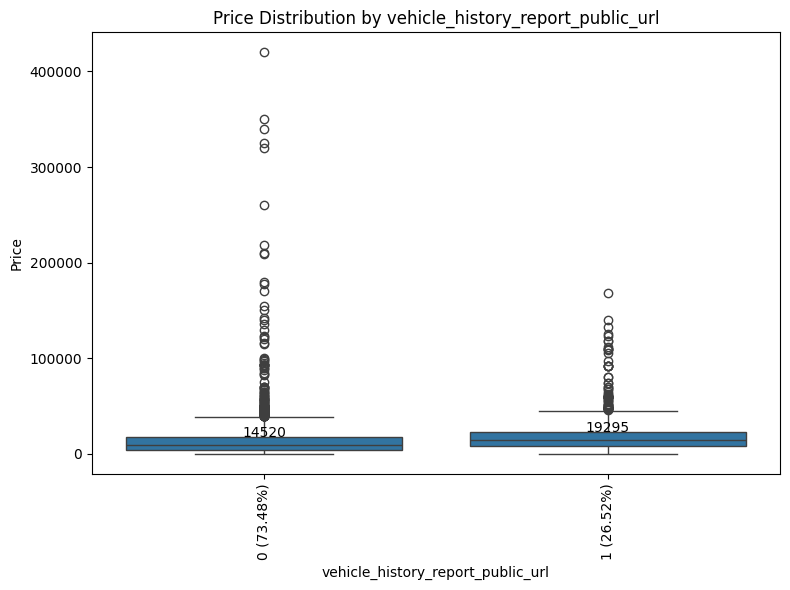

None


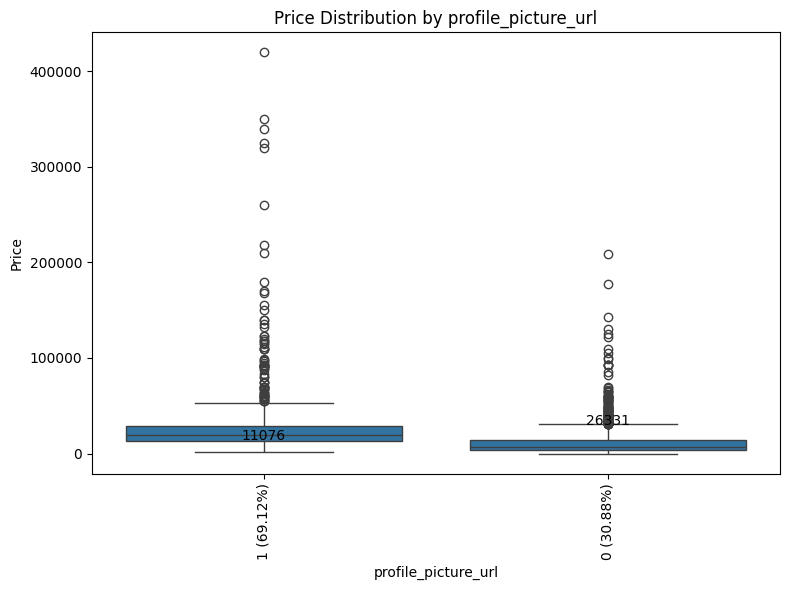

None


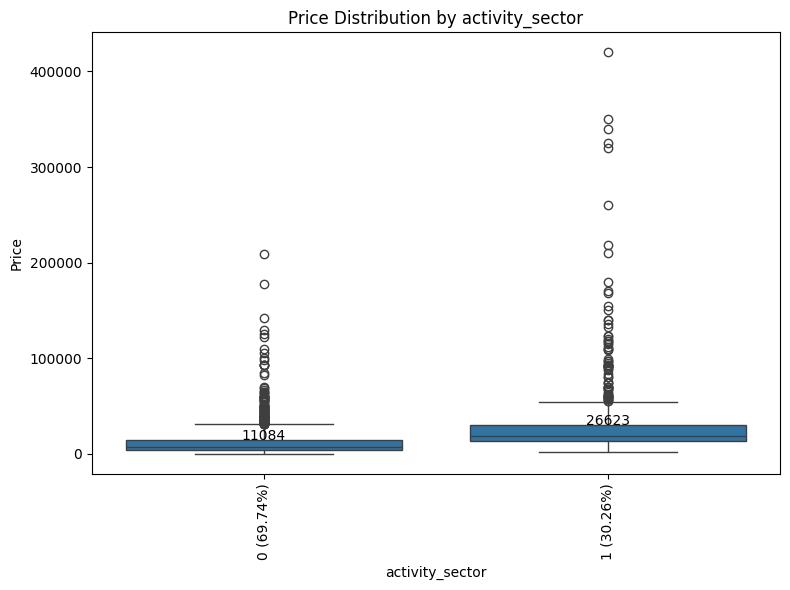

None


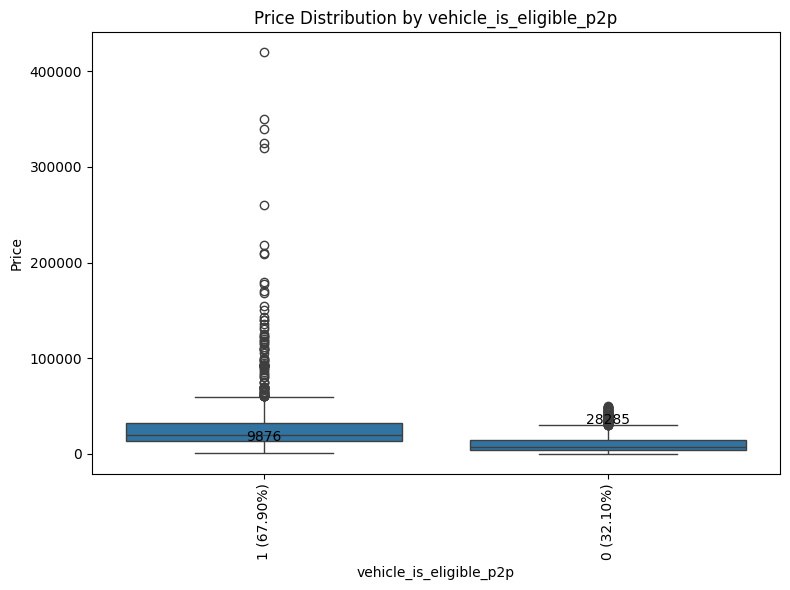

None


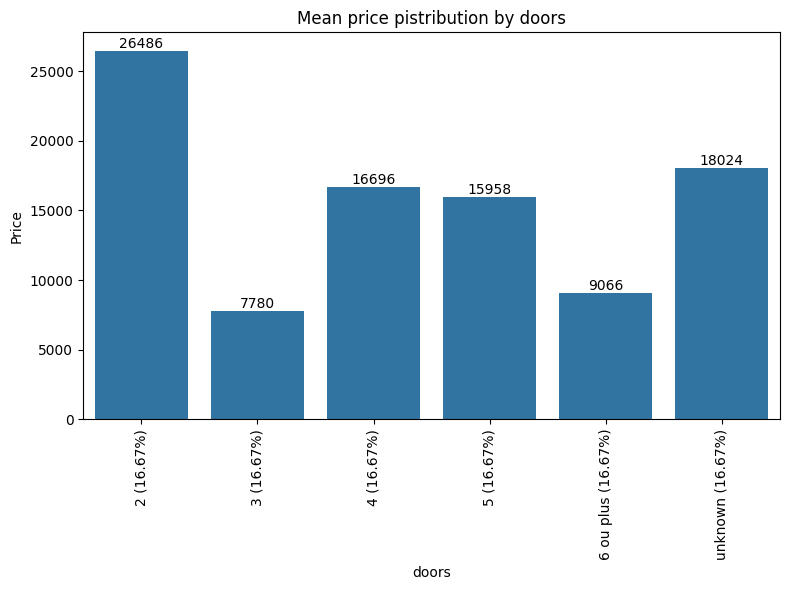

None


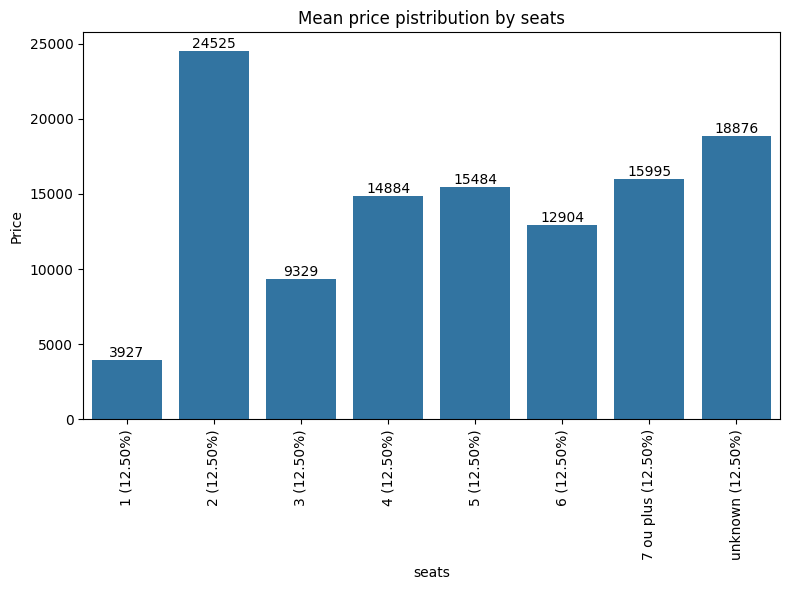

None


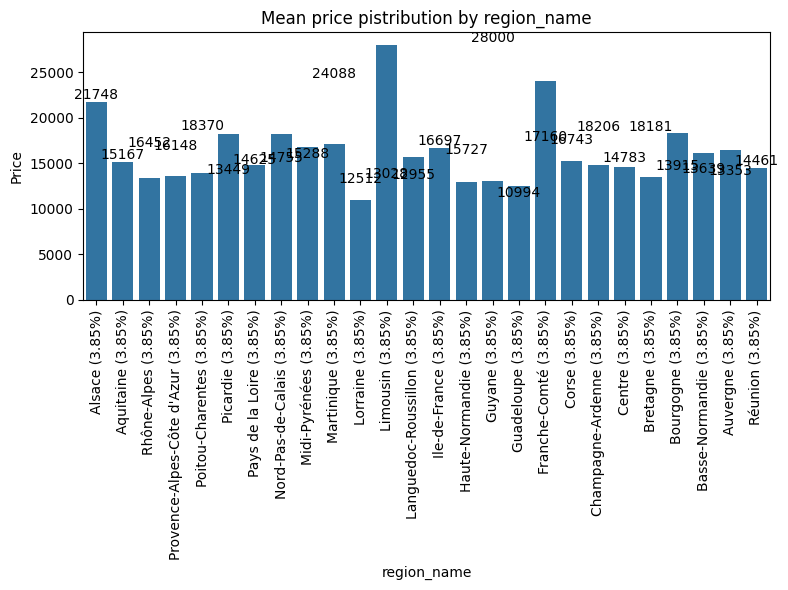

None


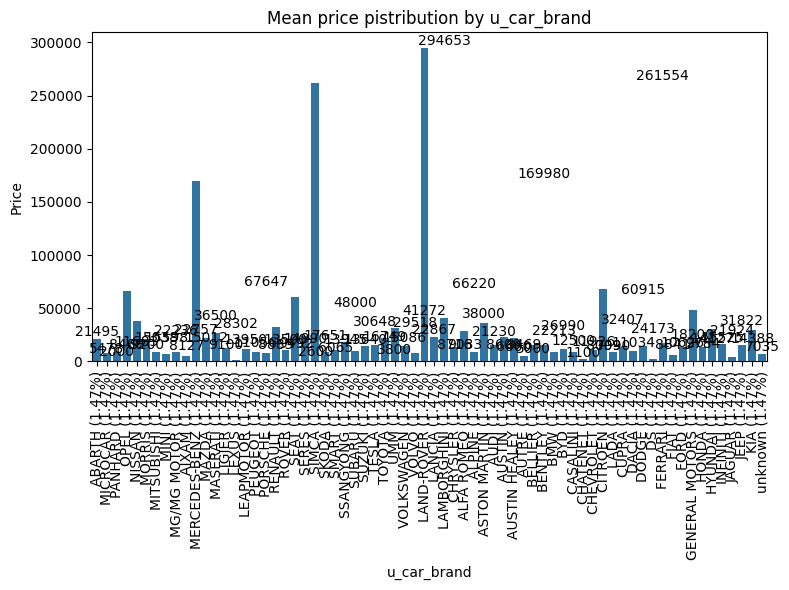

None


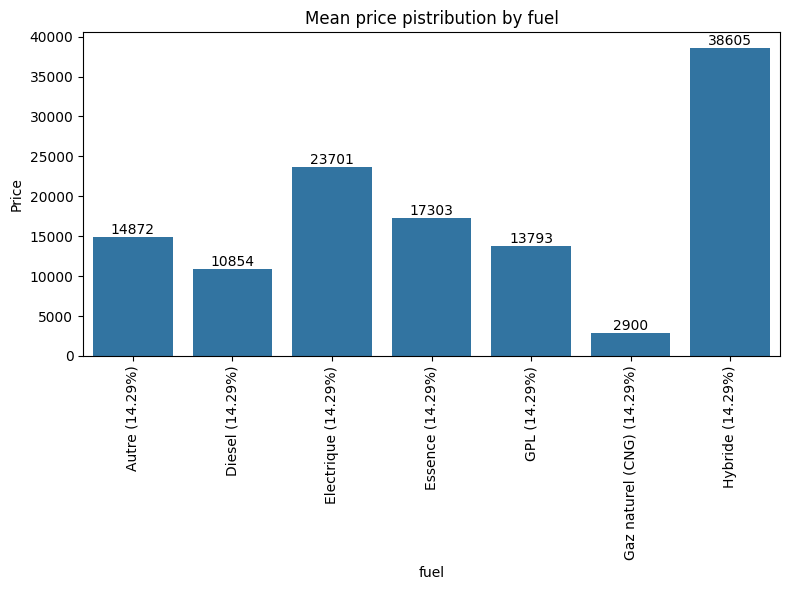

None


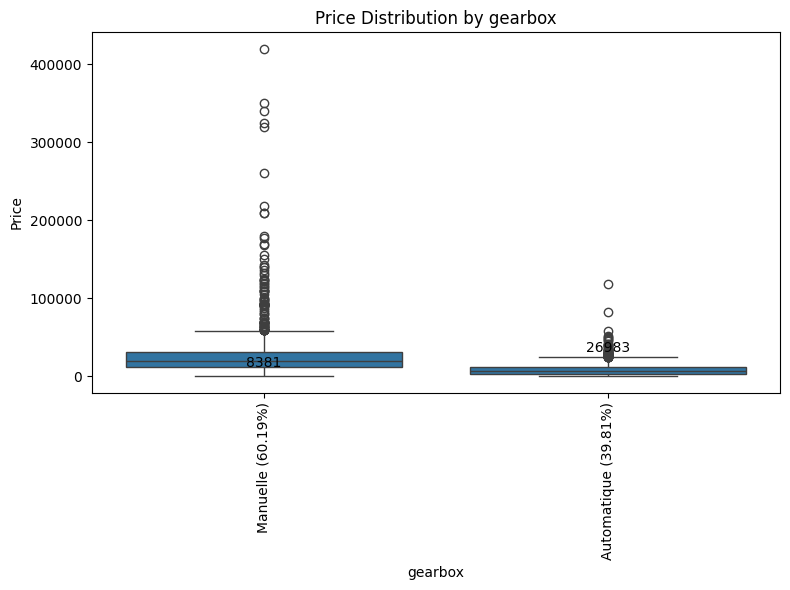

None


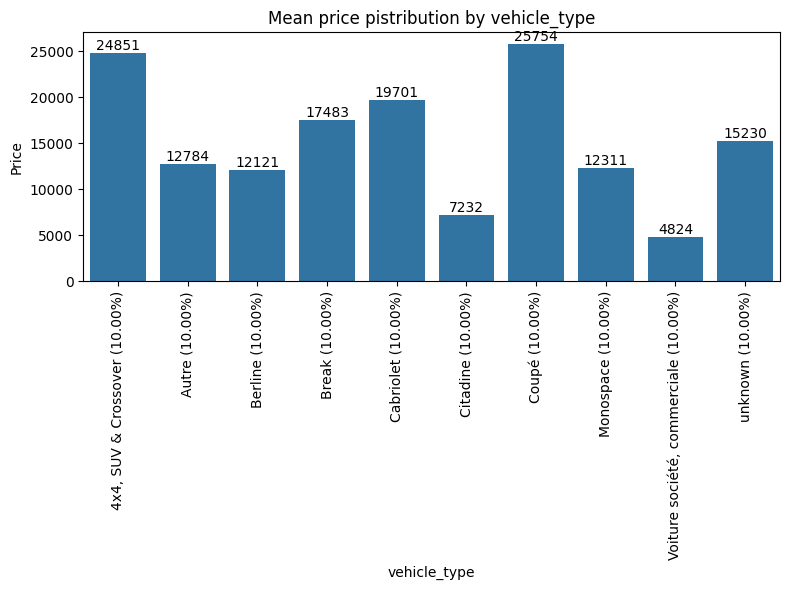

None


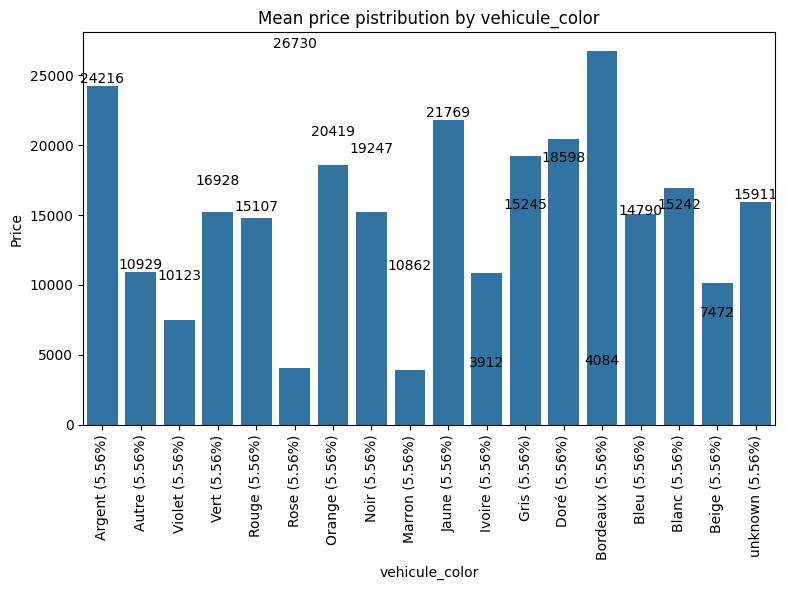

None


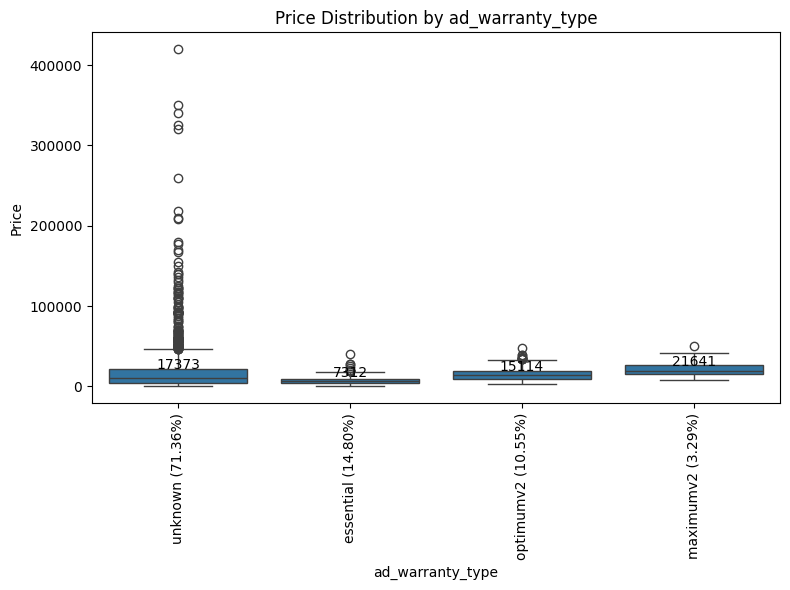

None


In [25]:
for col in cols_to_explore_bin + cols_to_explore_qual:
    print(binary_categorical_plot(col,leboncoin_ads_filtered_extended))

In [26]:
if not os.path.exists("graphs"):
    os.makedirs("graphs")
def num_plot(column_name,data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot( y=column_name, data=data, ax=ax1)
    ax1.set_title(f'Distribution of {column_name}')
    ax1.set_ylabel(column_name)
    mean_price = data[column_name].mean()
    # Add the mean as a horizontal line
    ax1.axhline(mean_price, color='red', linestyle='--', label=f'Mean: {mean_price:.0f}')
    # Optionally, add text for the mean value
    ax1.text(0.05, mean_price, f'Mean: {mean_price:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    sns.scatterplot(x=col, y='price', data=data)
    ax2.set_title(f'{column_name} vs price')
    ax2.set_xlabel(column_name)
    ax2.set_ylabel('Price')
    
    #save graphs
    save_path = os.path.join("graphs", f'Price Distribution by {column_name}.png')
    plt.savefig(save_path)

    # Display the plot
    plt.tight_layout()
    plt.show()

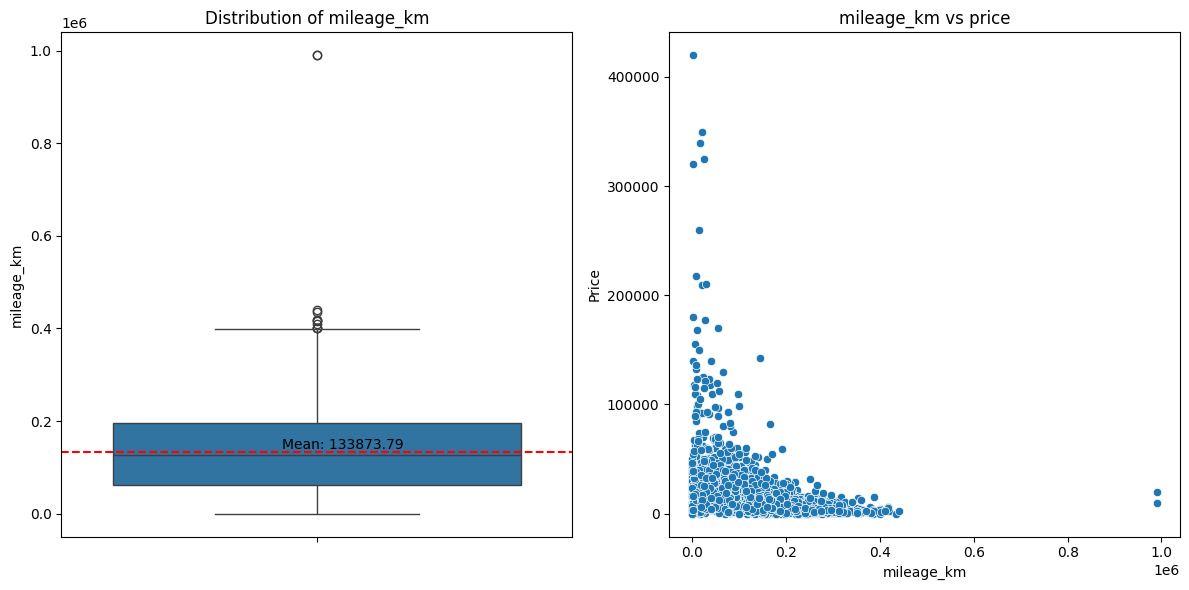

None


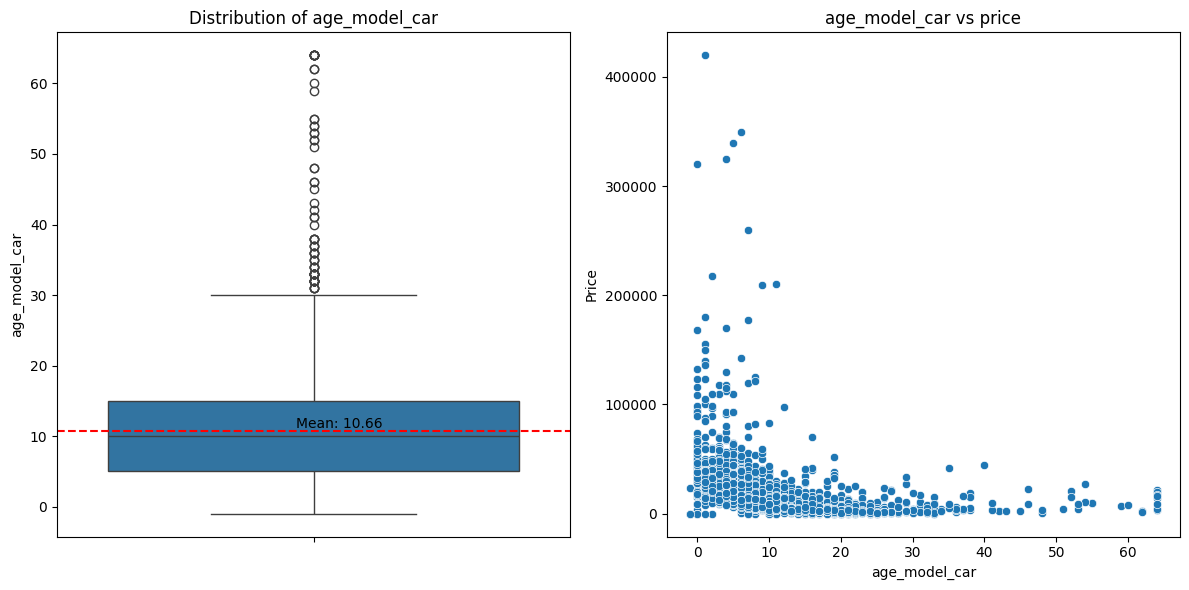

None


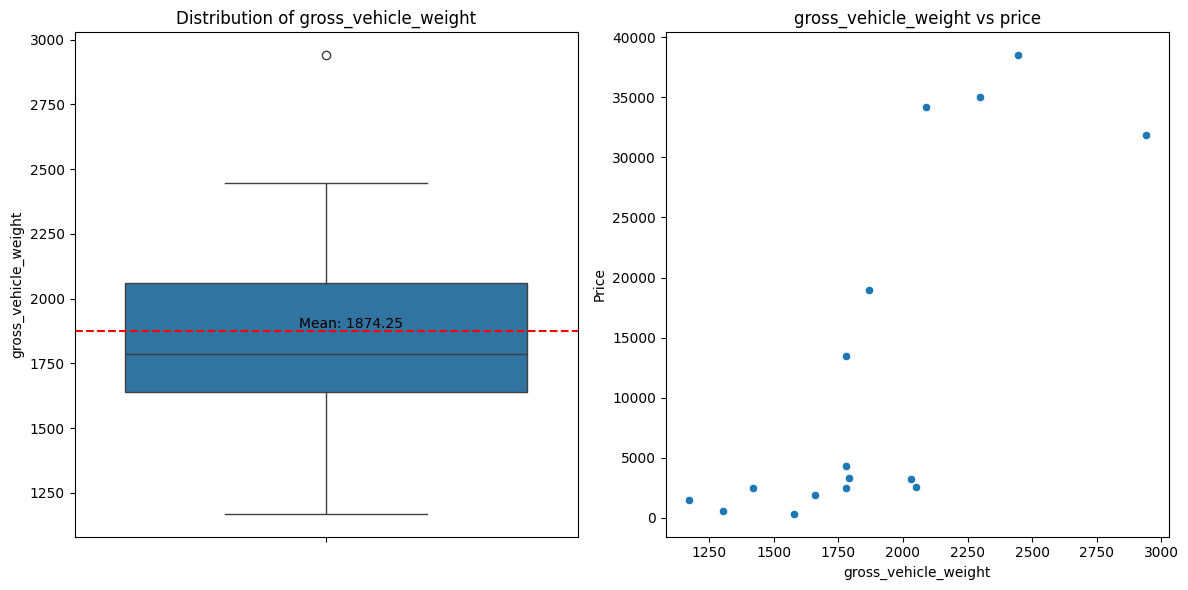

None


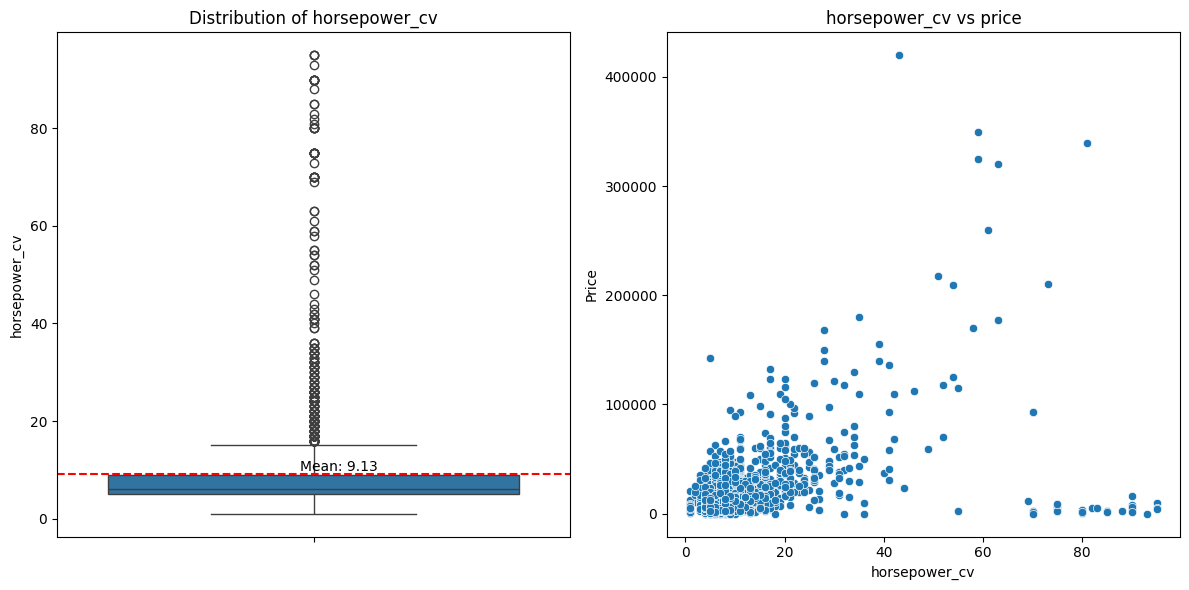

None


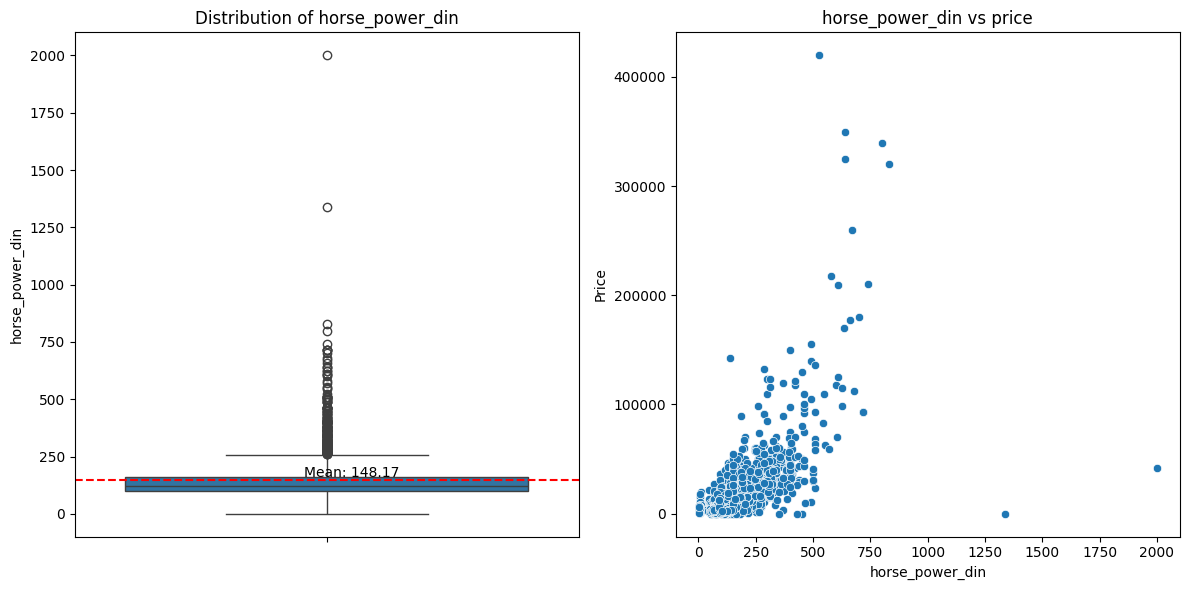

None


In [27]:
for col in cols_to_explore_num:
    print(num_plot(col,leboncoin_ads_filtered_extended))

In [22]:
# data=leboncoin_ads_filtered_extended.groupby('horse_power_din')['price'].mean().reset_index()
# sns.scatterplot(x='horse_power_din',y="price", data=data)
# for i in range(len(data)):
#     plt.text(data['horse_power_din'][i], data['price'][i], 
#              f'{data["price"][i]:.2f}',  # Format the price value
#              ha='center', va='bottom', fontsize=10, color='black')
#     plt.xticks(rotation=90)

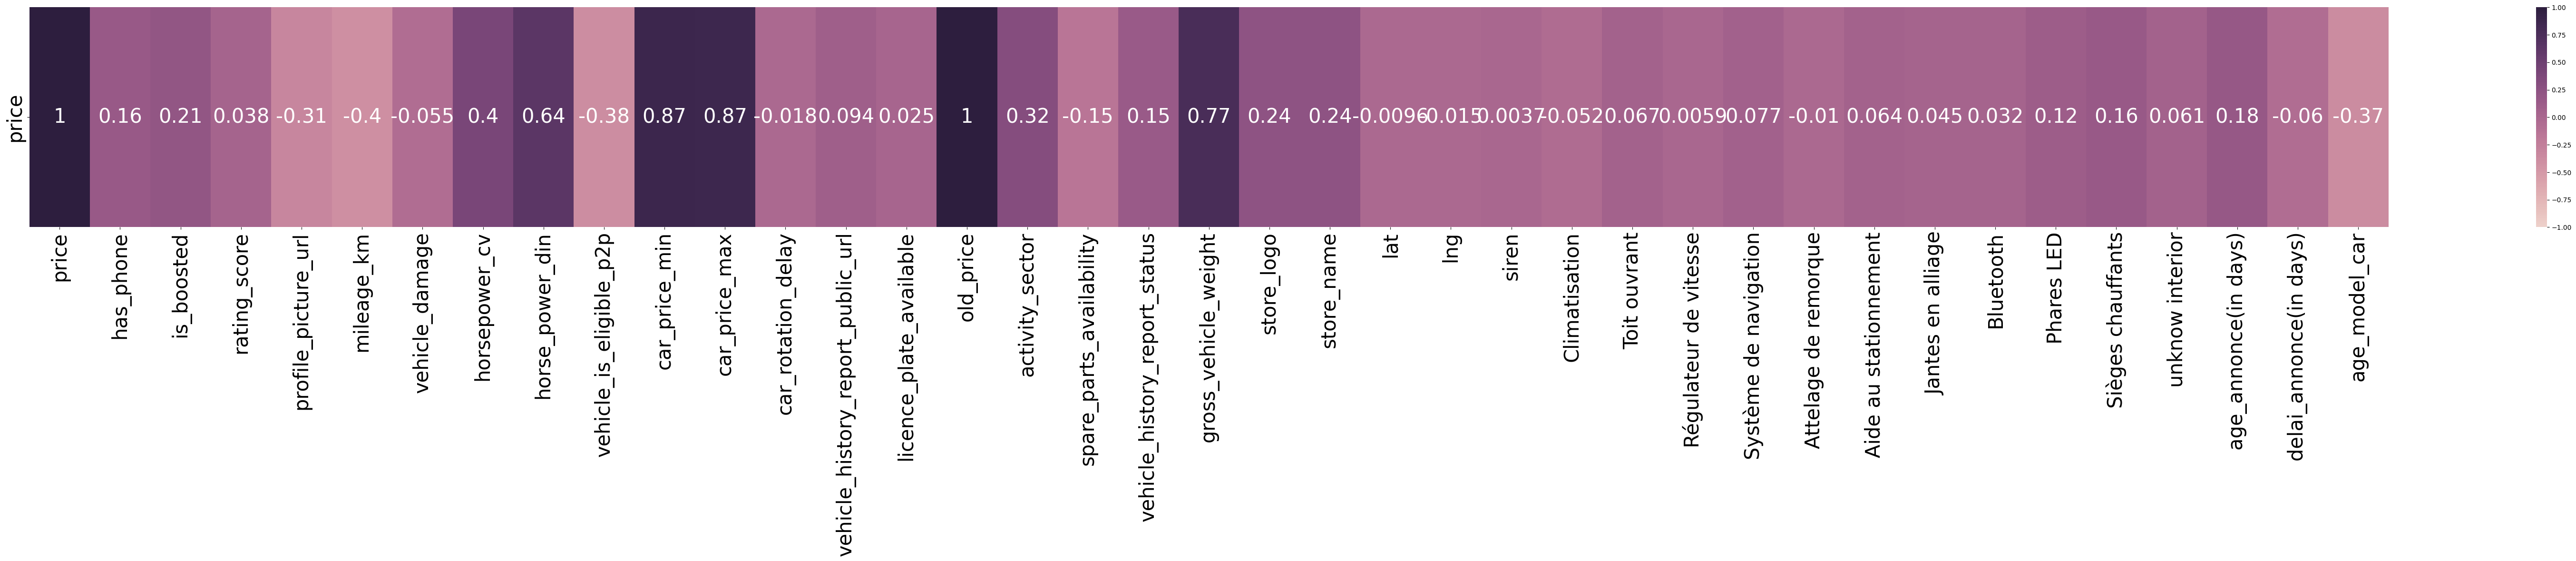

In [28]:
plt.figure(figsize=(80, 6))
ax=sns.heatmap(leboncoin_ads_filtered_extended[leboncoin_ads_filtered_extended.columns[~leboncoin_ads_filtered_extended.columns.isin(leboncoin_ads_filtered_extended.select_dtypes(include='object').columns)]].corr()[['price']].transpose() , 
               annot=True, 
               cmap=sns.cubehelix_palette(as_cmap=True),
               vmin=-1, vmax=1, annot_kws={"size": 30})
plt.tick_params(axis='both', which='major', labelsize=30)
save_path = os.path.join("graphs", 'correlation_var_num_with_price.png')
plt.savefig(save_path)

# Modelling

In [29]:
#import libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_squared_error

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#Target vs variables
y = leboncoin_ads_filtered_extended["price"]
X = leboncoin_ads_filtered_extended.drop(["price"], axis=1)

In [34]:
numerical_features=leboncoin_ads_filtered_extended.columns[~leboncoin_ads_filtered_extended.columns.isin(leboncoin_ads_filtered_extended.select_dtypes(include='object').columns)]
categorical_features=leboncoin_ads_filtered_extended.columns[leboncoin_ads_filtered_extended.columns.isin(leboncoin_ads_filtered_extended.select_dtypes(include='object').columns)]

In [ ]:
#train_test split
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state = 0,test_size=0.2, train_size=0.8)

In [ ]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Replace with your numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Replace with your categorical columns
    ]
)

# Models and their parameter grids
models = [
    ('linear_reg', LinearRegression()),  # Base model
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('neural_net', MLPRegressor(max_iter=1000, random_state=42)),
    ('xgboost', XGBRegressor(random_state=42)),
    ('catboost', CatBoostRegressor(verbose=0, random_state=42)),
    ('lightgbm', LGBMRegressor(random_state=42))
]

param_grids = {
    'linear_reg': {},
    'decision_tree': {
        'classifier__max_depth': [None]+[i for i in range(2,11,2)],
        'classifier__min_samples_split': [i for i in range (2,11,2)],
        'classifier__min_samples_leaf': [i for i in range (2,11,2)]
    },
    'random_forest': {
        'classifier__n_estimators': [i for i in range(50, 200, 25)],
        'classifier__max_depth': [None]+[i for i in range(2,11,2)],
        'classifier__min_samples_split': [i for i in range (2,11,2)],
        'classifier__min_samples_leaf': [i for i in range (2,11,2)]
    },
    'neural_net': {
        'classifier__activation':['identity','relu','tanh','logistic'],
        'classifier__learning_rate':[i/10 for i in range(1,6)],
        'classifier__max_iter': [i for i in range(50, 200, 50)],
        'classifier__alpha': [0.0001, 0.001, 0.01]
    },
    'xgboost': {
        'classifier__n_estimators': [i for i in range(50, 200, 25)],
        'classifier__max_depth': [None]+[i for i in range(2,11,2)],
        'classifier__min_samples_split': [i for i in range (2,11,2)],
        'classifier__min_samples_leaf': [i for i in range (2,11,2)],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    },
    'catboost': {
        'classifier__depth': [None]+[i for i in range(2,11,5)],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__iterations': [100, 200]
    },
    'lightgbm': {
        'classifier__num_leaves': [31, 50, 100],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__n_estimators': [50, 100, 200]
    }
}

# Define pipeline
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())  # Placeholder for GridSearchCV
])

# Define the scoring metric (Mean Squared Error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform GridSearchCV for each model
best_models = {}

for name, model in models:
    print(f"Training {name}...")
    # Update pipeline with the model
    pipe.set_params(classifier=model)
    # Create GridSearchCV object with the model's parameter grid
    grid_search = GridSearchCV(
        pipe,
        param_grids[name] if name in param_grids else {},
        cv=3,
        scoring=scorer,
        refit=True,
        verbose=1
    )
    # Fit the model
    grid_search.fit(X_train, y_train)
    # Store best model and its score
    best_models[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': -grid_search.best_score_  # Convert negative MSE to positive
    }

# Display results
for name, result in best_models.items():
    print(f"\n{name}:\nBest Params: {result['best_params']}\nBest MSE: {result['best_score']}")